# 북촌 한옥마을의 유동인구는 언제 제일 많을까?
### : 비선형 회귀로 알아보는 북촌 한옥마을 유동인구 트렌드

제작자: 이재용 (서울대학교 교육학과 교육공학전공 석사과정, 2021-26891)

## 연구 배경
북촌 한옥마을은 경복궁의 동북쪽에 위치한 서울의 대표적 관광지로, 마을 곳곳에 한옥이 보존되어 있어 고즈넉한 분위기를 즐길 수 있는 곳이다. 이에 북촌 한옥마을은 분위기 있는 모임 또는 데이트 장소로 활용되며, 관광객들은 주로 식사를 하고 차를 마시거나 마을을 산책한다. 따라서 북촌 한옥마을에는 점심과 저녁에 가장 사람이 많을 것이다. 특히 직장인들이 퇴근한 이후인 저녁 시간에 사람이 더 많을 것이다.


한편 북촌 한옥마을에는 유동인구를 파악하기 위해 CCTV가 3개 지점에 설치되어 있다. 세 지점 중 덕성여자고등학교 앞이 있는데, 이 위치는 관광객들이 지하철 3호선 안국역에서 시작하여 북촌 한옥마을에 가장 쉽게 갈 수 있는 길의 초입이다. 따라서 이 위치에서의 유동인구가 다른 지점보다 많을 것이며, 이 지점에서의 유동인구 데이터를 북촌 한옥마을 전체의 유동인구를 대표하는 값으로 활용할 수 있다.  

 
본 연구에서는 덕성여고 앞 유동인구 데이터를 토대로 북촌 한옥마을의 유동인구가 점심시간(12시), 저녁시간(18시)에 가장 많을 것이라는 가설을 검증해보고자 한다.  

## 연구 문제
1. 북촌 한옥마을 유동인구는 시간에 따라 주기적으로 변화하는가?
2. 북촌 한옥마을 유동인구는 점심시간(12시)과 저녁시간(12시)에 증가하는가?
3. 북촌 한옥마을 유동인구는 점심시간보다 저녁시간에 더 많은가?

## 데이터
서울시 북촌 CCTV 유동인구 수집 정보

[https://data.seoul.go.kr/dataList/OA-12838/S/1/datasetView.do](https://data.seoul.go.kr/dataList/OA-12838/S/1/datasetView.do)

- 수집 기간: 2020.12.01~2021.09.30
- 수집 간격: 10분 (매일 144회)
- 변수: 카메라 번호, 주소, 상세 설명, 측정 시작 시간, 측정 종료 시간, 카메라 통과 인원(IN), 카메라 통과 인원(OUT), 데이터입력시간

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 불러오기
fdir = "./bukchon"
fpaths = [os.path.join(fdir, fname) for fname in os.listdir(fdir)]
fpaths = sorted(fpaths)
fpaths

['./bukchon/2015_BUKCHON_CCTV.csv',
 './bukchon/2016_BUKCHON_CCTV.csv',
 './bukchon/2017_BUKCHON_CCTV.csv',
 './bukchon/2018_BUKCHON_CCTV.csv',
 './bukchon/201909-12_BUKCHON_CCTV.csv',
 './bukchon/201912-03_BUKCHON_CCTV.csv',
 './bukchon/202003-06_BUKCHON_CCTV.csv',
 './bukchon/202006-09_BUKCHON_CCTV.csv',
 './bukchon/202009-12_BUKCHON_CCTV.csv',
 './bukchon/202012-03_BUKCHON_CCTV.csv',
 './bukchon/202103-06_BUKCHON_CCTV.csv',
 './bukchon/202106-09_BUKCHON_CCTV.csv']

In [120]:
# 202009~202109 데이터를 이어붙여 하나의 표로 만들기
df = pd.DataFrame()
for fpath in fpaths[-3:]:
    df = pd.concat([df, pd.read_csv(fpath, encoding='cp949')])
    print(df.shape)
df.head()


(36887, 8)
(48831, 8)
(99894, 8)


,카메라 번호,주소,상세 설명,측정 시작 시간,측정 종료 시간,카메라 통과 인원 (IN),카메라 통과 인원 (OUT),데이터입력시간
0,2,계동길 69,계동교회 앞,2020-12-01 00:00:37,2020-12-01 00:10:37,1,5,2020-12-01 00:10:37
1,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:00:37,2020-12-01 00:10:37,3,2,2020-12-01 00:10:37
2,4,북촌로5가길 38,삼청파출소 사잇길,2020-12-01 00:00:37,2020-12-01 00:10:37,4,4,2020-12-01 00:10:37
3,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:10:37,2020-12-01 00:20:37,12,2,2020-12-01 00:20:37
4,2,계동길 69,계동교회 앞,2020-12-01 00:10:37,2020-12-01 00:20:37,4,5,2020-12-01 00:20:37


In [122]:
# 덕성여고 앞 데이터만 들어있는 데이터프레임 만들기
cam_num = 1

df2 = df[df["카메라 번호"]==1]
print(df2.shape)
df2.head()

(32954, 8)


,카메라 번호,주소,상세 설명,측정 시작 시간,측정 종료 시간,카메라 통과 인원 (IN),카메라 통과 인원 (OUT),데이터입력시간
1,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:00:37,2020-12-01 00:10:37,3,2,2020-12-01 00:10:37
3,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:10:37,2020-12-01 00:20:37,12,2,2020-12-01 00:20:37
7,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:20:37,2020-12-01 00:30:37,17,8,2020-12-01 00:30:37
10,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:30:37,2020-12-01 00:40:37,17,17,2020-12-01 00:40:37
13,1,율곡로3길 50,덕성여고 앞,2020-12-01 00:40:37,2020-12-01 00:50:37,32,21,2020-12-01 00:50:37


## 데이터 전처리
1. 시각 문자열을 시간 단위의 숫자로 변환
2. 카메라 통과 인원(IN) 변환

    - 기존: 해당 날짜에서 해당 시각까지 카메라에 새롭게 인식된 사람 수의 총합 (누적 O)

    - 변경: 해당 날짜에서 해당 시각부터 10분 간 새롭게 인식된 사람 수 (누적 X)
    

In [125]:
## 1) 시각 문자열을 시간 단위의 숫자로 변환
## 참고: https://www.geeksforgeeks.org/convert-date-string-to-timestamp-in-python/
import time
import datetime

## 시각 문자열과 단위를 입력하면 변환된 숫자를 출력하는 함수 정의
def convert_time(string, unit):
    seconds = time.mktime(datetime.datetime.strptime(string,"%Y-%m-%d %H:%M:%S").timetuple())
    units = ["sec", "min", "hr", 'd']
    divider = [1., 60., 3600., 3600*24.]
    return seconds/divider[units.index(unit)]

## 변환 테스트
string = '2020-12-08 00:20:38'
for unit in ["sec", "min", "hr", 'd']:
    print(unit, convert_time(string, unit))

## 변환 전 문자열과 변환된 시간을 빈 딕셔너리에 저장
d = {}
d['date'] = df2['측정 시작 시간'].tolist()
d['time'] = [(convert_time(string, "hr")-convert_time(d["date"][0], "hr")) for string in d["date"]]

sec 1607354438.0
min 26789240.633333333
hr 446487.3438888889
d 18603.639328703703


In [143]:
## 2) 카메라 통과 인원(IN) 변환

## 기존 수치가 누적 수치이므로, 주어진 시각에서의 수치와 이전 시각의 수치의 차이 계산
d['traffic'] = [df2['카메라 통과 인원 (IN)'].iloc[i]-df2['카메라 통과 인원 (IN)'].iloc[i-1] if i != 0 else 0 for i in range(df2.shape[0])]
# 음수를 0으로 표시: 위 방식으로 계산하면 날짜가 바뀌는 시점의 유동인구가 음수로 나타남
d['traffic'] = [t if t>=0 else 0 for t in d['traffic']] 


## 데이터프레임 형태로 시각, 유동인구 저장
data = pd.DataFrame.from_dict(data=d)
data.head()

,date,time,traffic
0,2020-12-01 00:00:37,0.000000,0
1,2020-12-01 00:10:37,0.166667,9
2,2020-12-01 00:20:37,0.333333,5
3,2020-12-01 00:30:37,0.500000,0
4,2020-12-01 00:40:37,0.666667,15


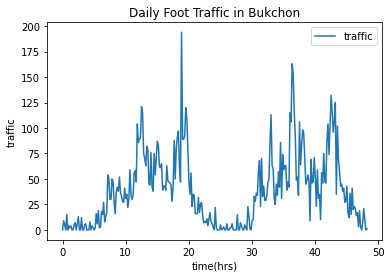

In [148]:
## 하루 동안 시간에 따른 유동인구 변화 
interval = 6*24*2 # 1시간에 6번씩 2일 동안
data.iloc[:interval].plot(x='time', y='traffic')
plt.title("Daily Foot Traffic in Bukchon")
plt.xlabel('time(hrs)')
plt.ylabel('traffic')
plt.show()

### 알 수 있는 점
- 9시, 12시, 18시경 유동인구가 늘어나는 경향이 있다.

## 회귀모형
### 아이디어
- 24시간을 주기로, 매일 9시, 12시, 18시마다 늘어나는 유동인구를 각각 하나의 사인 곡선으로 근사해보자.

### 독립변수
- x1: 주기가 24이고 시간 축 양의 방향으로 3만큼 평행이동한 사인 곡선 (9시에 최대)
- x2: 주기가 24이고 시간 축 양의 방향으로 6만큼 평행이동한 사인 곡선 (12시에 최대)
- x3: 주기가 24이고 시간 축 양의 방향으로 12만큼 평행이동한 사인 곡선 (18시에 최대)
### 종속변수
- y: 시간별 유동인구

In [185]:
# 독립변수

## x 절편을 편하게 구하기 위한 열
data['x0'] = 1 
## 주기가 24이고 시간 축 양의 방향으로 3만큼 평행이동한 사인 곡선 (9시에 최대)
data['x1'] = data.apply(lambda df: np.sin(2*np.pi/24*(df.time-3.)), axis=1) 
## 주기가 24이고 시간 축 양의 방향으로 6만큼 평행이동한 사인 곡선 (12시에 최대)
data['x2'] = data.apply(lambda df: np.sin(2*np.pi/24*(df.time-6.)), axis=1) 
## 주기가 24이고 시간 축 양의 방향으로 12만큼 평행이동한 사인 곡선 (18시에 최대)
data['x3'] = data.apply(lambda df: np.sin(2*np.pi/24*(df.time-12.)), axis=1)

# 종속변수
data['y'] = data.traffic

# 독립변수, 종속변수 행렬 만들기
X = data["x0 x1 x2 x3".split()].to_numpy()
Y = data['y'].to_numpy()

# 절편과 회귀계수 한번에 계산하기
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)

# 결과 출력
print("b0 = {}\nb1 = {}\nb2 = {}\nb3 = {}".format(b[0], b[1], b[2], b[3]))

b0 = 37.047663625259986
b1 = -7.0510091734627895
b2 = 21.58051164982456
b3 = 23.8617008459539


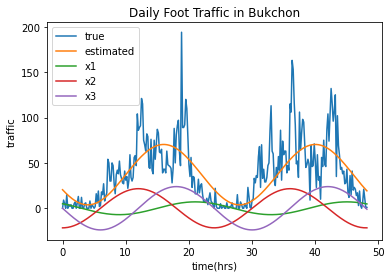

In [194]:
# 회귀분석으로 예측한 y값과 실제 y값 비교
data["y_hat"] = b[0] + b[1]*data.x1 + b[2]*data.x2 + b[3]*data.x3

interval = 24*6*2 #2일 동안의 데이터 보여주기
plt.plot(data.time[:interval], data['y'][:interval], label="true")
plt.plot(data.time[:interval], data['y_hat'][:interval], label="estimated")
plt.plot(data.time[:interval], b[1]*data.x1[:interval], label="x1")
plt.plot(data.time[:interval], b[2]*data.x2[:interval], label="x2")
plt.plot(data.time[:interval], b[3]*data.x3[:interval], label="x3")
plt.title("Daily Foot Traffic in Bukchon")
plt.xlabel('time(hrs)')
plt.ylabel('traffic')
plt.legend()
plt.show()

## 회귀모형 평가

In [195]:
print("b0 = {}\nb1 = {}\nb2 = {}\nb3 = {}".format(b[0], b[1], b[2], b[3]))

b0 = 37.047663625259986
b1 = -7.0510091734627895
b2 = 21.58051164982456
b3 = 23.8617008459539


1. 추정된 회귀계수의 절댓값은 12시<18시 였다.
    - 북촌의 유동인구는 점심보다 저녁에 더 많다.

  
2. 아침 시간대에 최대가 되는 사인함수에 대한 회귀계수는 음수였고, 절댓값이 점심/저녁보다 작았다.
    - 아침의 유동인구 증가는 점심/저녁만큼 두드러지게 나타나지 않는다.

## 향후 연구 과제
1. 위에서 계산한 회귀계수가 통계적으로 유의한지 확인한다.
2. 아침 시간에 최대가 되는 함수를 제외한 회귀모형을 학습시키고 위 모형과 비교한다.
3. 오류역전파(error back-propagation) 방식으로 회귀계수와 절편을 추정하여, 위에서 행렬 연산으로 얻은 값과 비교한다.
4. 회귀계수를 요일에 대한 함수로 간주하는 회귀모형을 구성하여 학습시키고, 모델의 설명력이 향상되었는지 비교한다. 
5. 공변인으로 기온, 강수량 등 유동인구에 영향을 주는 요인을 추가하여, 모델의 설명력이 향상되었는지 비교한다.
6. 유동인구 변화를 사인 함수가 아닌 정규 분포로 해석하는 Gaussian Mixture Model을 적용하여 아침, 점심, 저녁의 유동인구 분포를 분석한다.